In [1]:
import pandas as pd 
import numpy as np
import datetime
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
la_df = pd.read_csv("../deprecated_EDA/LA_quake_energy_1971_2023.csv")
la_df.head()

,Latitude,Longitude,1971_1,1971_2,1971_3,1971_4,1971_5,1971_6,1971_7,1971_8,...,2023_3,2023_4,2023_5,2023_6,2023_7,2023_8,2023_9,2023_10,2023_11,2023_12
0,-109.0,92.0,214883.660051,7.750986e+06,1.323845e+06,1.008567e+06,922869.432676,1.218962e+06,906976.976234,586887.529091,...,1.056009e+07,1.247830e+07,1.295133e+07,1.245500e+07,1.319728e+07,1.870089e+07,5.361820e+06,0,0,0
1,-109.0,82.8,215067.884653,7.765696e+06,1.326085e+06,1.010233e+06,924206.949050,1.220970e+06,908215.391391,587864.648587,...,1.055440e+07,1.246947e+07,1.294601e+07,1.245209e+07,1.319441e+07,1.870571e+07,5.360052e+06,0,0,0
2,-109.0,73.6,215216.262263,7.780612e+06,1.328365e+06,1.011881e+06,925557.025302,1.222948e+06,909332.584279,588586.727493,...,1.054579e+07,1.245675e+07,1.293764e+07,1.244599e+07,1.318975e+07,1.870992e+07,5.357183e+06,0,0,0
3,-109.0,64.4,215333.476972,7.795611e+06,1.330663e+06,1.013502e+06,926912.377412,1.224862e+06,910307.191618,589092.600817,...,1.053557e+07,1.244283e+07,1.292868e+07,1.243812e+07,1.318528e+07,1.871578e+07,5.353730e+06,0,0,0
4,-109.0,55.2,215424.657752,7.810536e+06,1.332953e+06,1.015086e+06,928263.600971,1.226676e+06,911122.309220,589463.127101,...,1.052468e+07,1.242993e+07,1.292327e+07,1.242947e+07,1.318665e+07,1.872804e+07,5.350041e+06,0,0,0


In [3]:
len(la_df)

441

In [4]:
la_df.drop(columns = ['Latitude', 'Longitude'], inplace = True)

In [5]:
transposed_df = la_df.T.reset_index()

In [6]:
# rename the index column to date
transposed_df.rename(columns = {"index": "date"}, inplace = True)


In [7]:
transposed_df.head()

,date,0,1,2,3,4,5,6,7,8,...,431,432,433,434,435,436,437,438,439,440
0,1971_1,2.148837e+05,2.150679e+05,2.152163e+05,2.153335e+05,2.154247e+05,2.154945e+05,2.155463e+05,2.155821e+05,2.156016e+05,...,2.192668e+05,2.203527e+05,2.222717e+05,2.263699e+05,2.394527e+05,4.202977e+05,2.670325e+05,2.300493e+05,2.225430e+05,2.192734e+05
1,1971_2,7.750986e+06,7.765696e+06,7.780612e+06,7.795611e+06,7.810536e+06,7.825195e+06,7.839361e+06,7.852778e+06,7.865163e+06,...,8.569445e+06,8.624287e+06,8.660563e+06,8.673499e+06,8.662546e+06,8.634721e+06,8.625857e+06,8.584637e+06,8.440533e+06,8.351894e+06
2,1971_3,1.323845e+06,1.326085e+06,1.328365e+06,1.330663e+06,1.332953e+06,1.335205e+06,1.337381e+06,1.339438e+06,1.341333e+06,...,1.431668e+06,1.440159e+06,1.446810e+06,1.450674e+06,1.451037e+06,1.448025e+06,1.442899e+06,1.438078e+06,1.440223e+06,1.556559e+06
3,1971_4,1.008567e+06,1.010233e+06,1.011881e+06,1.013502e+06,1.015086e+06,1.016625e+06,1.018104e+06,1.019506e+06,1.020808e+06,...,1.078457e+06,1.084297e+06,1.089149e+06,1.092530e+06,1.094010e+06,1.093301e+06,1.090361e+06,1.085461e+06,1.079137e+06,1.072024e+06
4,1971_5,9.228694e+05,9.242069e+05,9.255570e+05,9.269124e+05,9.282636e+05,9.295982e+05,9.308994e+05,9.321456e+05,9.333101e+05,...,9.880489e+05,9.917897e+05,9.951347e+05,9.974477e+05,9.980577e+05,9.963617e+05,9.924443e+05,9.871771e+05,9.814468e+05,9.757781e+05


In [8]:
len(transposed_df)

636

In [9]:
transposed_df = pd.DataFrame(transposed_df)

In [10]:
transposed_df['date'] = pd.to_datetime(transposed_df['date'], format='%Y_%m')
transposed_df

,date,0,1,2,3,4,5,6,7,8,...,431,432,433,434,435,436,437,438,439,440
0,1971-01-01,2.148837e+05,2.150679e+05,2.152163e+05,2.153335e+05,2.154247e+05,2.154945e+05,2.155463e+05,2.155821e+05,2.156016e+05,...,2.192668e+05,2.203527e+05,2.222717e+05,2.263699e+05,2.394527e+05,4.202977e+05,2.670325e+05,2.300493e+05,2.225430e+05,2.192734e+05
1,1971-02-01,7.750986e+06,7.765696e+06,7.780612e+06,7.795611e+06,7.810536e+06,7.825195e+06,7.839361e+06,7.852778e+06,7.865163e+06,...,8.569445e+06,8.624287e+06,8.660563e+06,8.673499e+06,8.662546e+06,8.634721e+06,8.625857e+06,8.584637e+06,8.440533e+06,8.351894e+06
2,1971-03-01,1.323845e+06,1.326085e+06,1.328365e+06,1.330663e+06,1.332953e+06,1.335205e+06,1.337381e+06,1.339438e+06,1.341333e+06,...,1.431668e+06,1.440159e+06,1.446810e+06,1.450674e+06,1.451037e+06,1.448025e+06,1.442899e+06,1.438078e+06,1.440223e+06,1.556559e+06
3,1971-04-01,1.008567e+06,1.010233e+06,1.011881e+06,1.013502e+06,1.015086e+06,1.016625e+06,1.018104e+06,1.019506e+06,1.020808e+06,...,1.078457e+06,1.084297e+06,1.089149e+06,1.092530e+06,1.094010e+06,1.093301e+06,1.090361e+06,1.085461e+06,1.079137e+06,1.072024e+06
4,1971-05-01,9.228694e+05,9.242069e+05,9.255570e+05,9.269124e+05,9.282636e+05,9.295982e+05,9.308994e+05,9.321456e+05,9.333101e+05,...,9.880489e+05,9.917897e+05,9.951347e+05,9.974477e+05,9.980577e+05,9.963617e+05,9.924443e+05,9.871771e+05,9.814468e+05,9.757781e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2023-08-01,1.870089e+07,1.870571e+07,1.870992e+07,1.871578e+07,1.872804e+07,1.874681e+07,1.875831e+07,1.899694e+07,1.893520e+07,...,1.888274e+07,1.894730e+07,1.908524e+07,1.901665e+07,1.902740e+07,1.906607e+07,1.911236e+07,1.914856e+07,1.922454e+07,1.923048e+07
632,2023-09-01,5.361820e+06,5.360052e+06,5.357183e+06,5.353730e+06,5.350041e+06,5.346319e+06,5.342670e+06,5.339132e+06,5.335680e+06,...,5.343838e+06,5.349055e+06,5.344985e+06,5.345196e+06,5.348178e+06,5.352850e+06,5.358410e+06,5.366393e+06,5.380113e+06,5.404569e+06
633,2023-10-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
634,2023-11-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
transposed_df.head()

,date,0,1,2,3,4,5,6,7,8,...,431,432,433,434,435,436,437,438,439,440
0,1971-01-01,2.148837e+05,2.150679e+05,2.152163e+05,2.153335e+05,2.154247e+05,2.154945e+05,2.155463e+05,2.155821e+05,2.156016e+05,...,2.192668e+05,2.203527e+05,2.222717e+05,2.263699e+05,2.394527e+05,4.202977e+05,2.670325e+05,2.300493e+05,2.225430e+05,2.192734e+05
1,1971-02-01,7.750986e+06,7.765696e+06,7.780612e+06,7.795611e+06,7.810536e+06,7.825195e+06,7.839361e+06,7.852778e+06,7.865163e+06,...,8.569445e+06,8.624287e+06,8.660563e+06,8.673499e+06,8.662546e+06,8.634721e+06,8.625857e+06,8.584637e+06,8.440533e+06,8.351894e+06
2,1971-03-01,1.323845e+06,1.326085e+06,1.328365e+06,1.330663e+06,1.332953e+06,1.335205e+06,1.337381e+06,1.339438e+06,1.341333e+06,...,1.431668e+06,1.440159e+06,1.446810e+06,1.450674e+06,1.451037e+06,1.448025e+06,1.442899e+06,1.438078e+06,1.440223e+06,1.556559e+06
3,1971-04-01,1.008567e+06,1.010233e+06,1.011881e+06,1.013502e+06,1.015086e+06,1.016625e+06,1.018104e+06,1.019506e+06,1.020808e+06,...,1.078457e+06,1.084297e+06,1.089149e+06,1.092530e+06,1.094010e+06,1.093301e+06,1.090361e+06,1.085461e+06,1.079137e+06,1.072024e+06
4,1971-05-01,9.228694e+05,9.242069e+05,9.255570e+05,9.269124e+05,9.282636e+05,9.295982e+05,9.308994e+05,9.321456e+05,9.333101e+05,...,9.880489e+05,9.917897e+05,9.951347e+05,9.974477e+05,9.980577e+05,9.963617e+05,9.924443e+05,9.871771e+05,9.814468e+05,9.757781e+05


In [12]:
transposed_df.isnull().sum()

date      0
0       178
1       178
2       178
3       178
       ... 
436     178
437     178
438     178
439     178
440     178
Length: 442, dtype: int64

In [13]:
## use the KNNImputer to fill in the null values for this dataset
transposed_df_copy = transposed_df.copy()
transposed_df.drop(columns = 'date', inplace = True)
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(transposed_df)
filled_na_df = pd.DataFrame(data = imputed_data, columns = transposed_df.columns)
filled_na_df.insert(0, "date", transposed_df_copy['date'])

In [18]:
## run a decomposition analysis on a random subet of 10 columns from the dataset, since thier is over 400 it 
# would be hard to visualize all of them
# set the date as the index for the dataset
set_index = filled_na_df.set_index('date')
# Randomly select 10 columns for decomposition (excluding 'date')
random.seed(42)
columns_to_decompose = random.sample(set_index.columns.tolist(), 10)

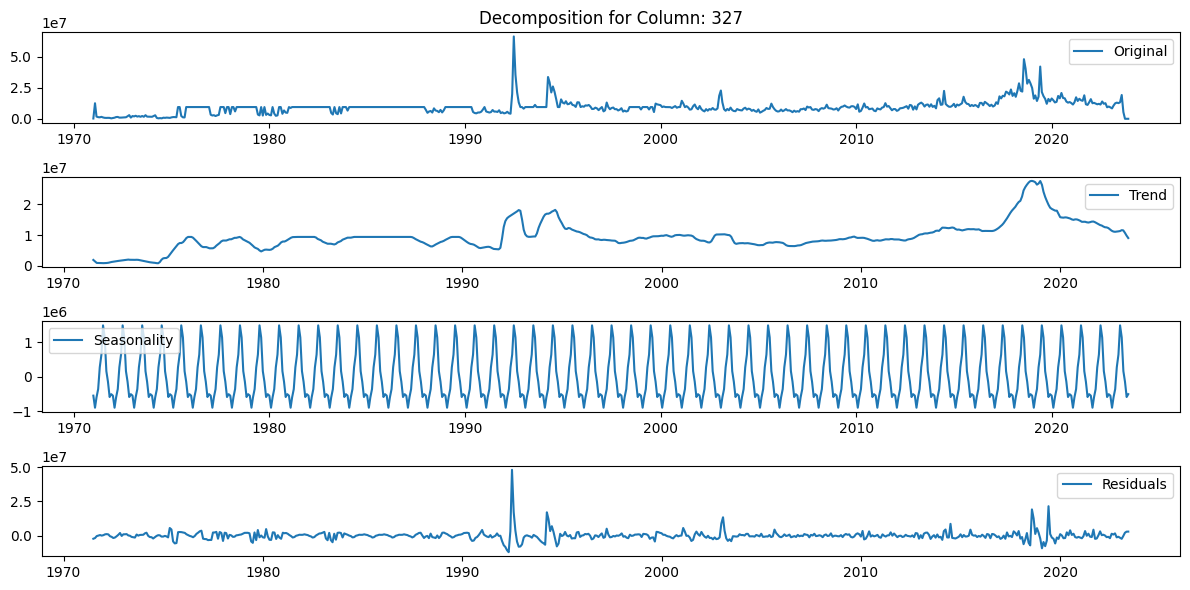

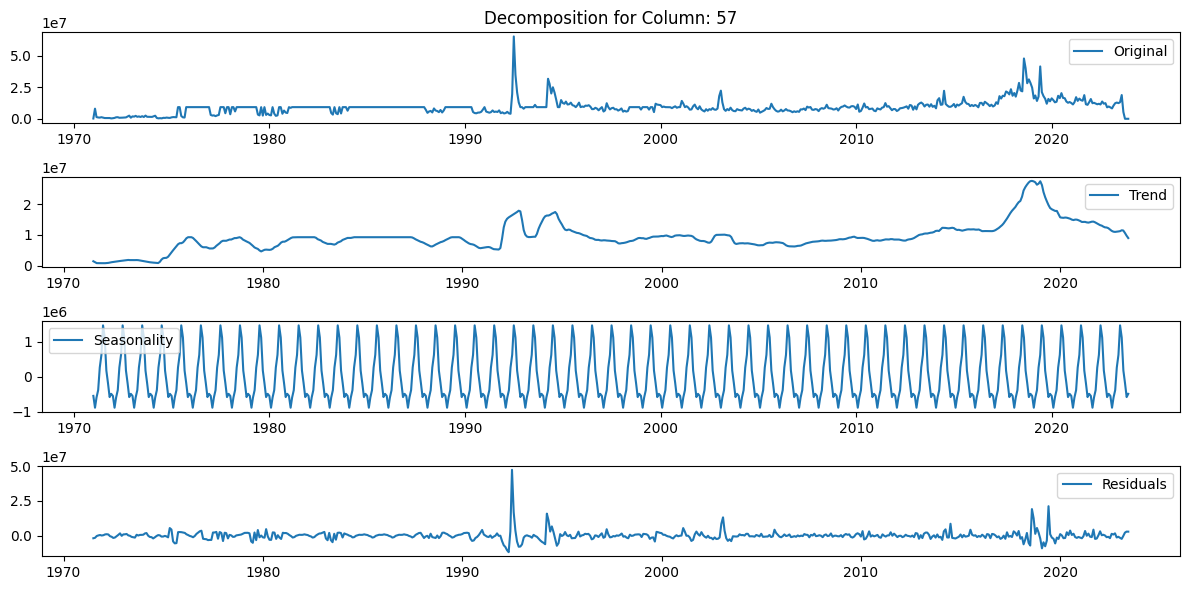

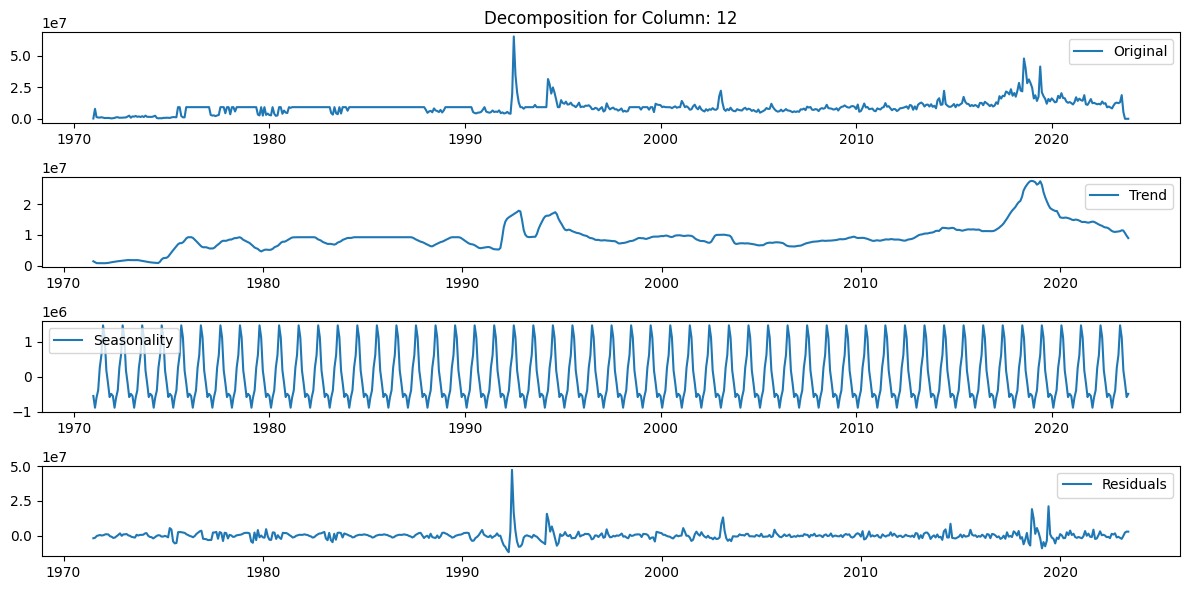

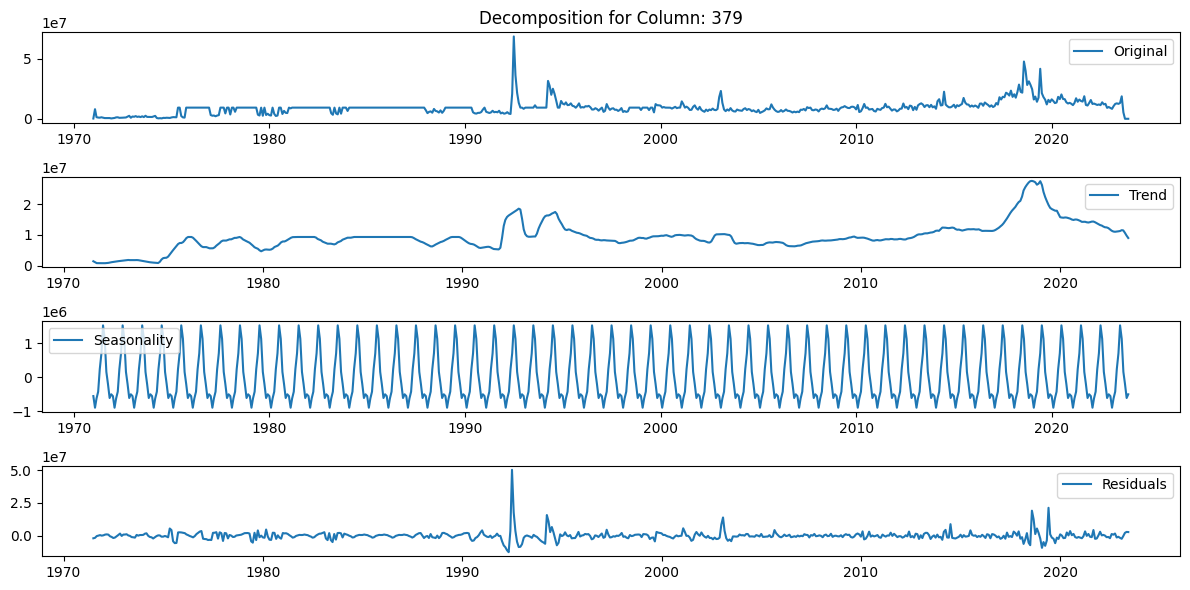

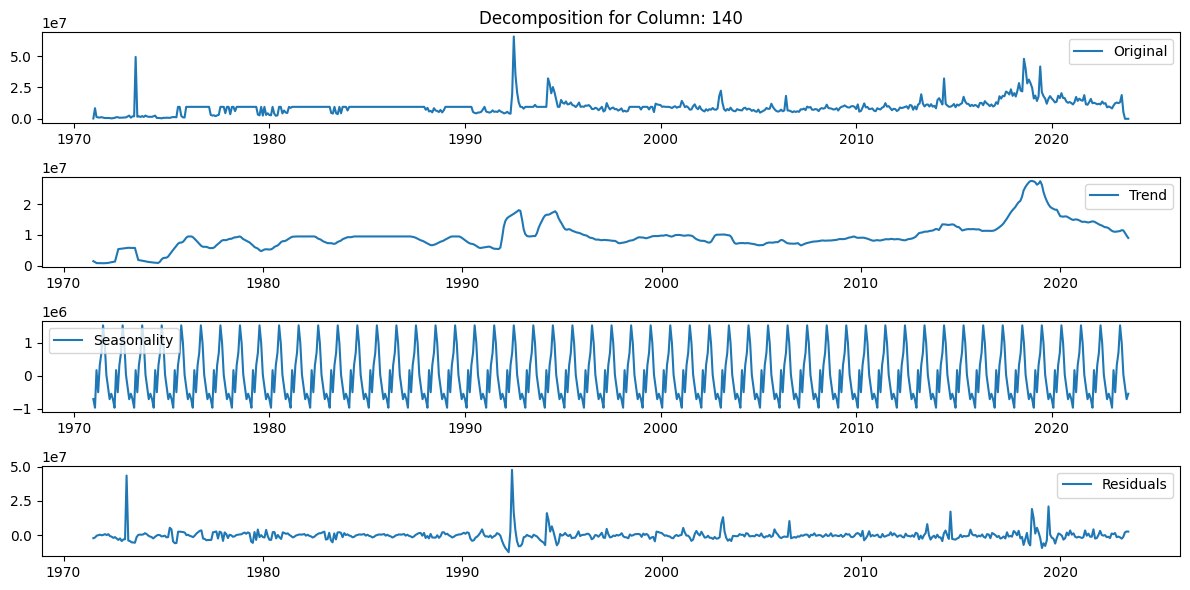

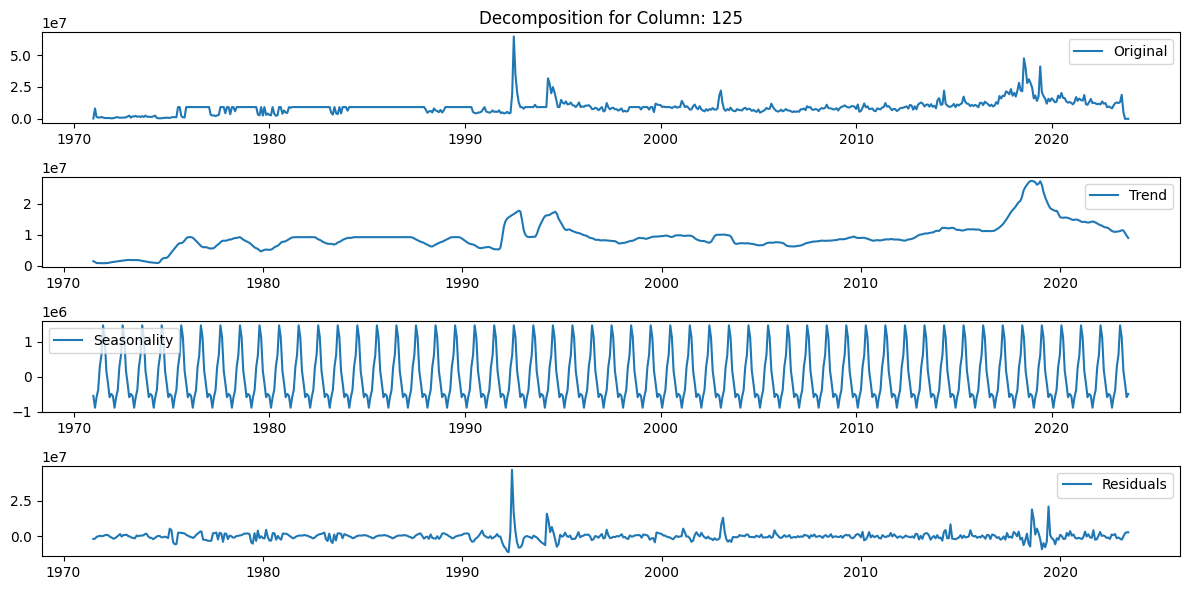

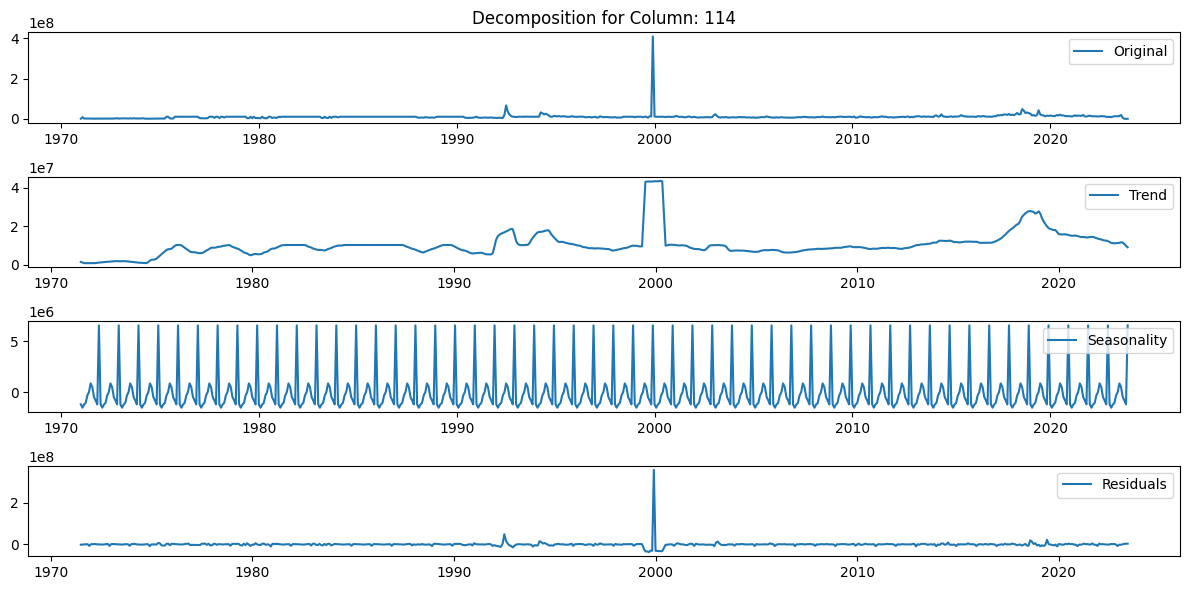

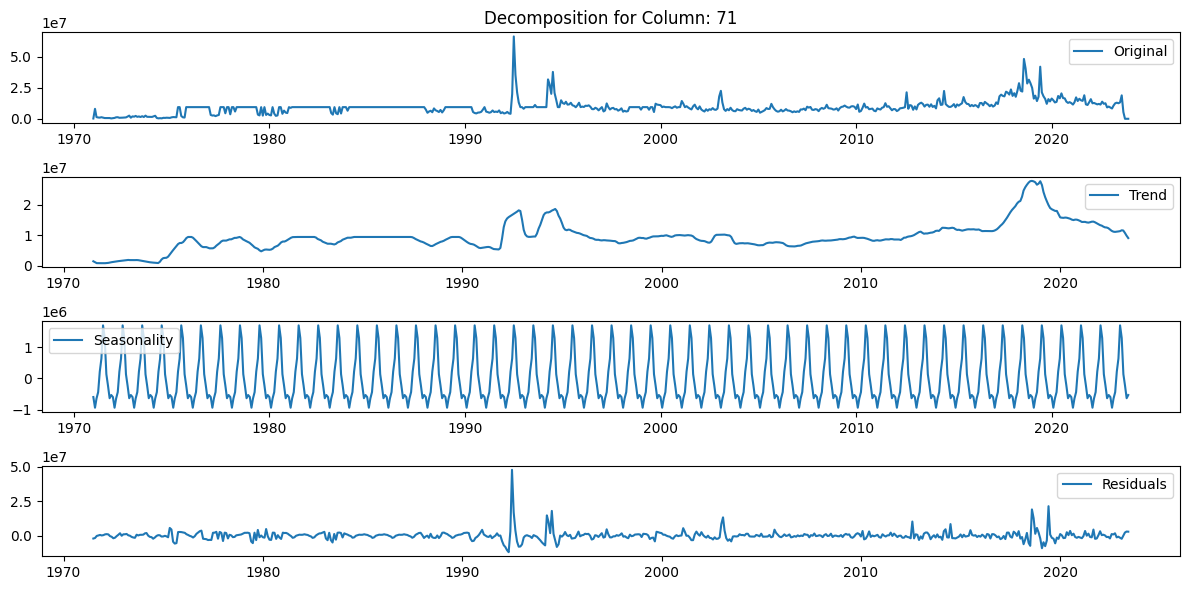

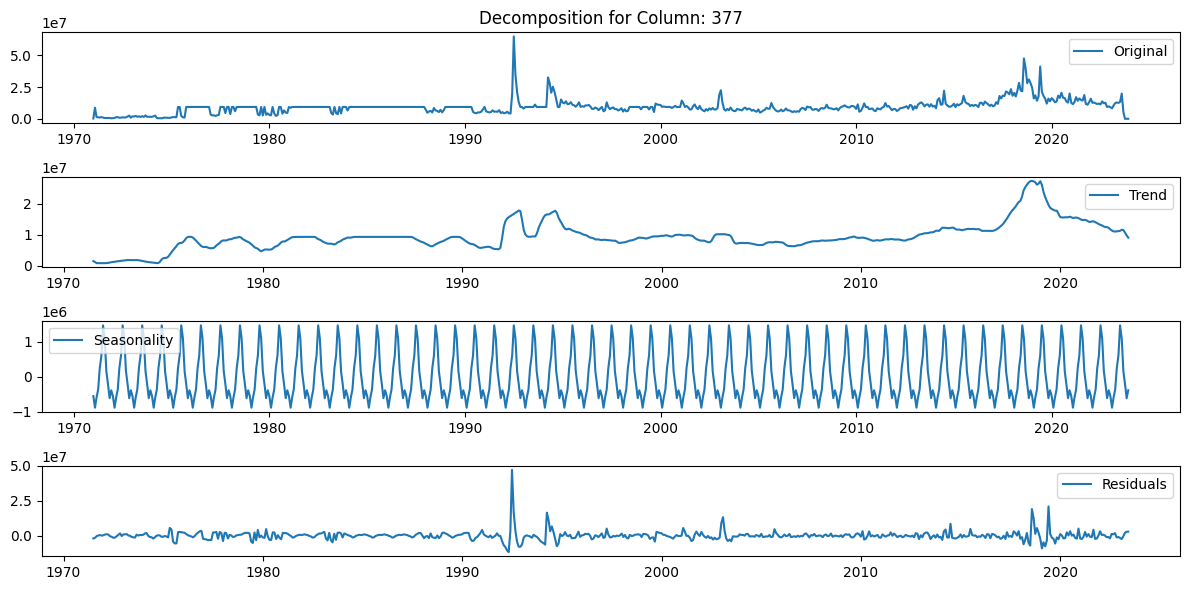

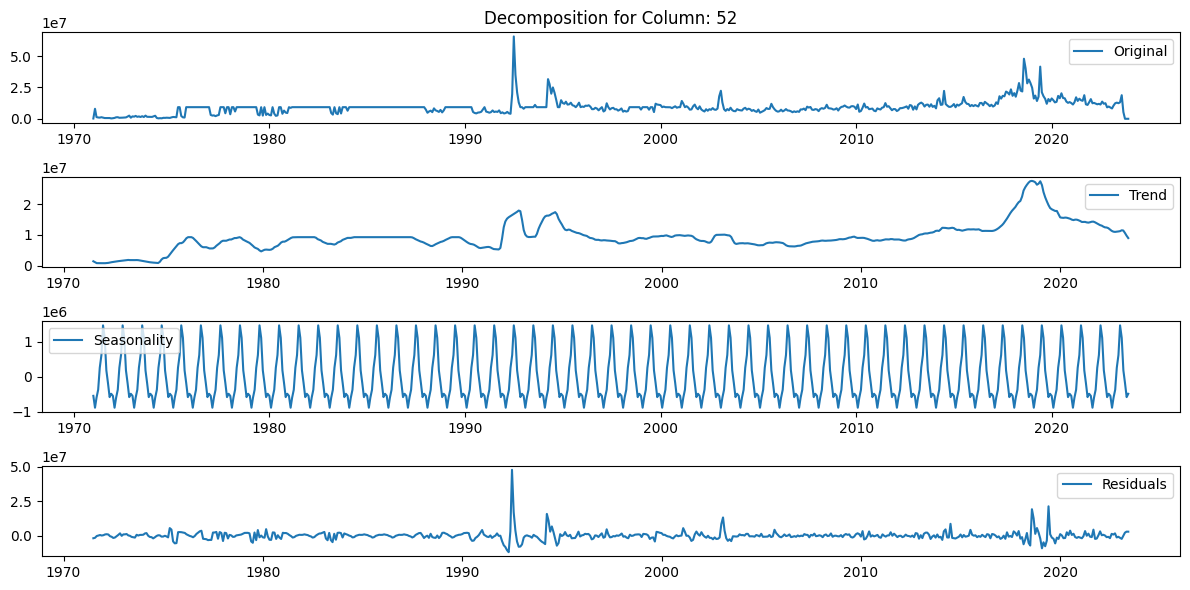

In [19]:
# loop over the decomped column and visualze the different plot for trend, residuals and seasonality
# Perform time series decomposition for the selected columns
for column in columns_to_decompose:
    decomposition = sm.tsa.seasonal_decompose(set_index[column], model='additive')
    
    # Plot the decomposed components
    plt.figure(figsize=(12, 6))
    plt.subplot(411)
    plt.plot(set_index[column], label='Original')
    plt.legend(loc='best')
    plt.title(f'Decomposition for Column: {column}')
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

These charts provide insights into the underlying patterns in the earthquake data through time series decomposition. It appears that there is a seasonal component, as evidenced by noticeable spikes presumably occurring in the summer months, while declines are observed around the start of the new year, suggesting wintertime (assuming typical seasonal patterns and without explicit month labels on the x-axis, this inference might require further validation).

The trend component illustrates the general direction of the data over time, derived from the difference between the original data and the seasonal plus residual components. In the current trend plot, the y-axis represents the trend values, and the x-axis represents time (likely in years). The trend line's slope provides insight into whether the data is increasing or decreasing over time.

The residual component is the difference between the original data and the fitted values (seasonal + trend components). In the current residual plot, the x-axis represents time, and the y-axis represents the residual values. This plot highlights the variation in the data that isn't explained by the trend and seasonal components, portraying the 'leftover' variability in the data.